<a href="https://colab.research.google.com/github/ravenZ3/SunlightTracking/blob/main/SunTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import some bits
import ephem, math, datetime

home = ephem.Observer()
# Set up
home.date = '2017-01-01 09:00:00'
home.lat = '53.4975'
home.lon = '-0.3154'

ModuleNotFoundError: ignored

In [ ]:
!pip install ephem


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.0 MB/s eta 0:00:00


In [ ]:
# Import some bits
import ephem, math, datetime
# Get retina display quality for plots
%config InlineBackend.figure_format = 'retina'

home = ephem.Observer()
# Set up
home.date = '2023-11-24 09:00:00'
home.lat = '12.9922'
home.lon = '80.2353'

In [ ]:
home.elev

0.0

In [ ]:
home.temp

15.0

In [ ]:
home.pressure

1010.0

In [ ]:
sun = ephem.Sun()
sun.compute(home)

In [ ]:
rising = home.previous_rising(sun).datetime()
print('Sunrise is at {}:{}:{}'.format(rising.hour, rising.minute, rising.second))

transit = home.next_transit(sun).datetime()
print('Local noon is at {}:{}:{}'.format(transit.hour, transit.minute, transit.second))

setting = home.next_setting(sun).datetime()
print('Sunset is at {}:{}:{}'.format(setting.hour, setting.minute, setting.second))

Sunrise is at 0:41:21
Local noon is at 6:25:52
Sunset is at 12:9:43


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

# Prepare
home.date = '2023/1/1'
sun = ephem.Sun()
times = []

def get_diff(tm):
    """Return a difference in seconds between tm and 12:00:00 on tm's date"""
    a = datetime.datetime.combine(tm, datetime.time(12, 0))
    return (a-tm).total_seconds()/60

# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    trans = home.next_transit(sun).datetime()
    times.append(get_diff(trans))

# Set up
ts = pd.Series(times, index=pd.date_range('2023/1/1', periods=len(times)))

In [ ]:
ts.loc['2023-11-24':'2023-12-26']

2023-11-24    334.119784
2023-11-25    333.816465
2023-11-26    333.500845
2023-11-27    333.173119
2023-11-28    332.833503
2023-11-29    332.482239
2023-11-30    332.119594
2023-12-01    331.745864
2023-12-02    331.361368
2023-12-03    330.966456
2023-12-04    330.561500
2023-12-05    330.146900
2023-12-06    329.723080
2023-12-07    329.290489
2023-12-08    328.849605
2023-12-09    328.400930
2023-12-10    327.944997
2023-12-11    327.482364
2023-12-12    327.013616
2023-12-13    326.539359
2023-12-14    326.060214
2023-12-15    325.576806
2023-12-16    325.089763
2023-12-17    324.599700
2023-12-18    324.107217
2023-12-19    323.612896
2023-12-20    323.117298
2023-12-21    322.620967
2023-12-22    322.124428
2023-12-23    321.628196
2023-12-24    321.132775
2023-12-25    320.638664
2023-12-26    320.146360
Freq: D, dtype: float64

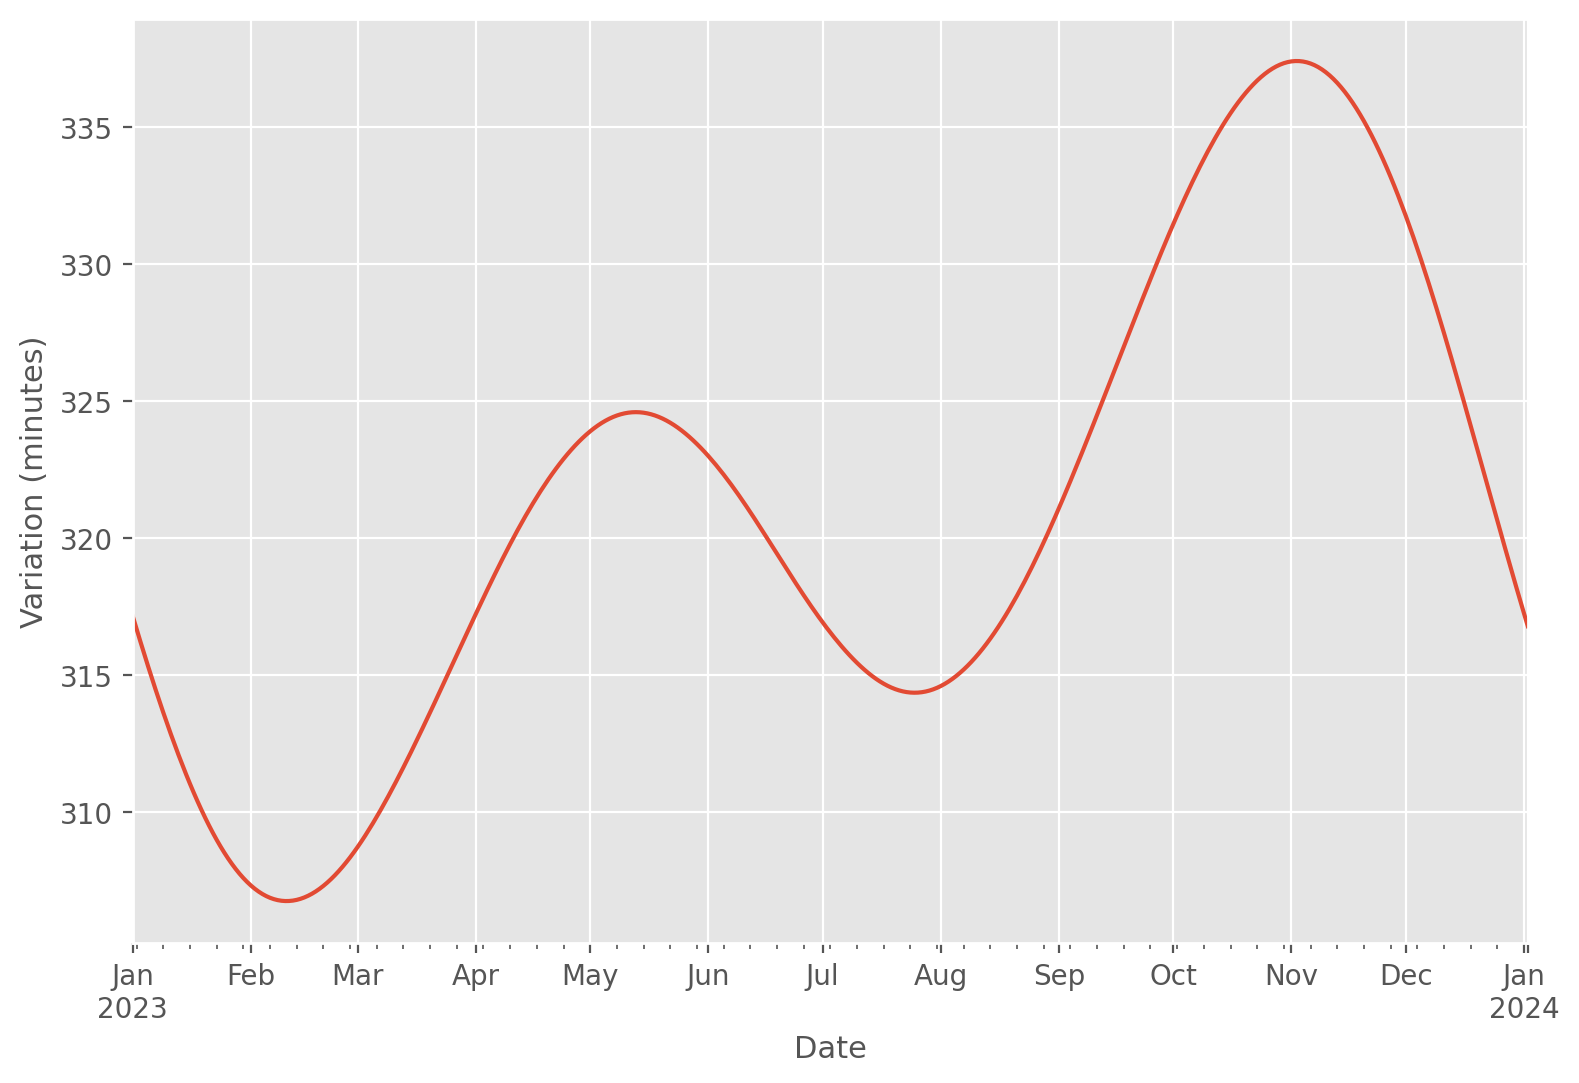

In [ ]:
ax = ts.plot()
plt.rcParams["figure.figsize"] = [9, 6]
ax.set_xlabel(u'Date', fontsize=11)
ax.set_ylabel(u'Variation (minutes)', fontsize=11)
# Fire
plt.show()

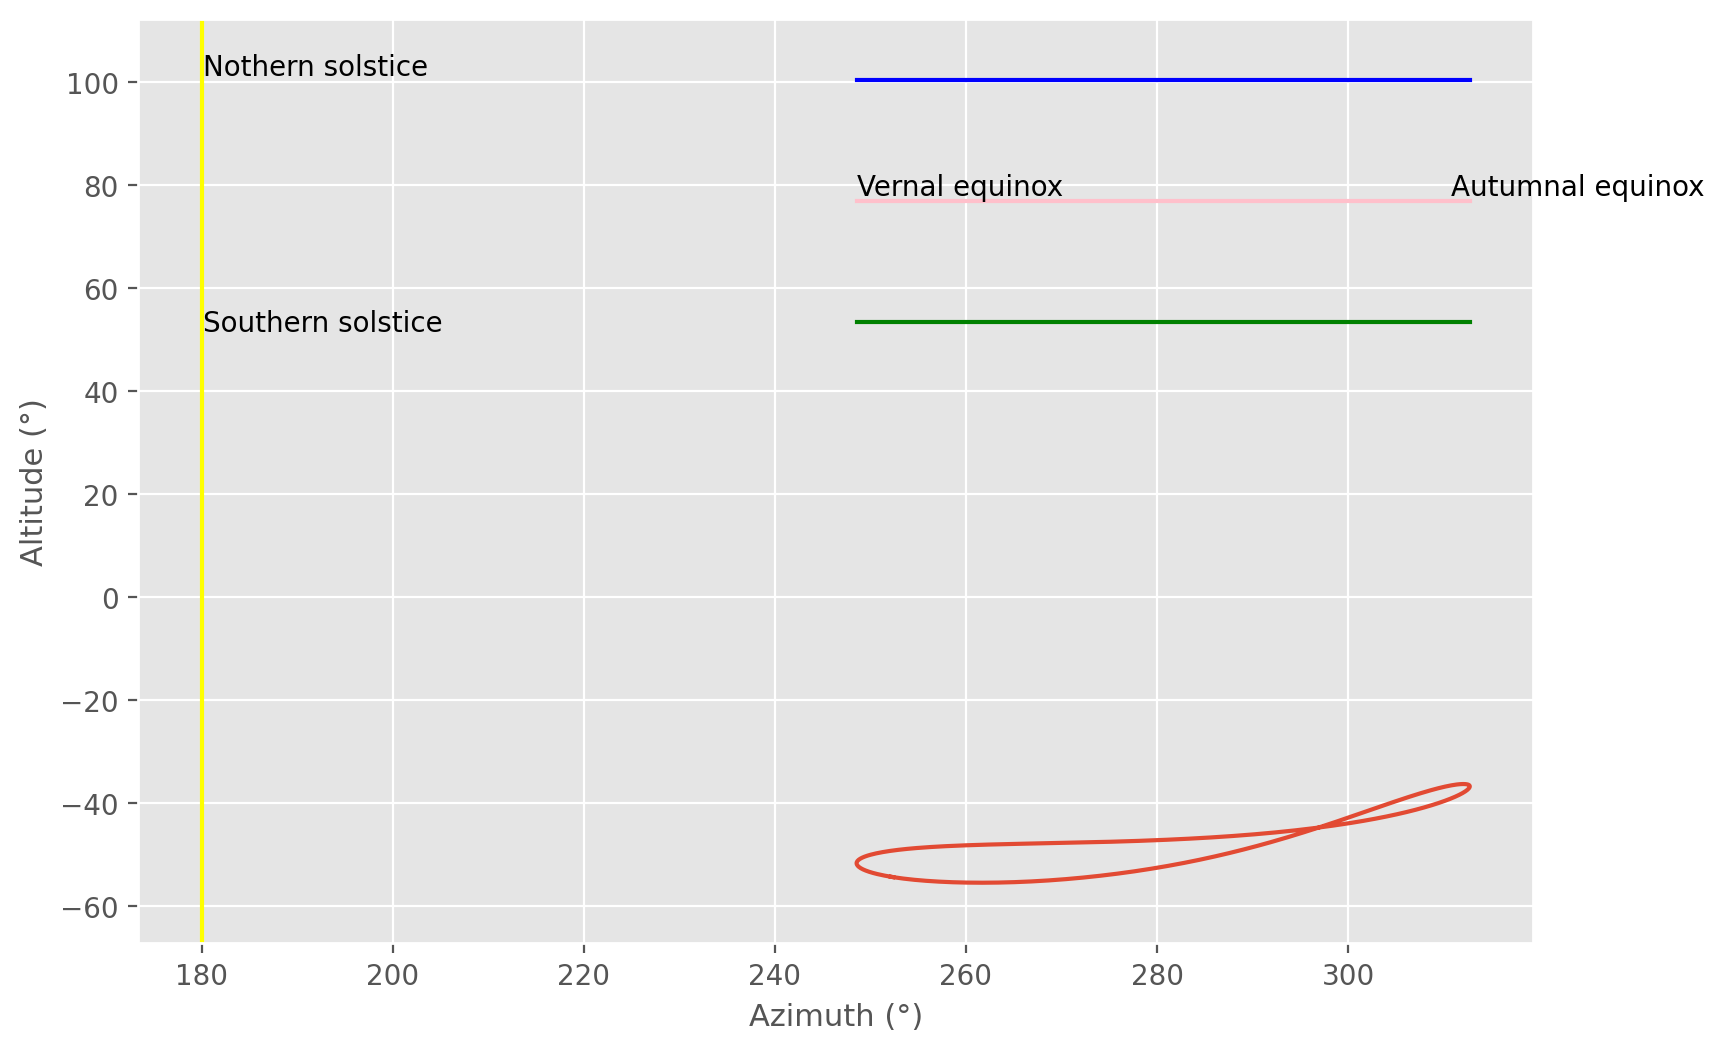

In [ ]:
# Prepare
home.date = '2023/11/24 16:00:00'
sun = ephem.Sun()
posx = []
posy = []

# Solstice altitude
phi = 90 - math.degrees(home.lat)
# Earth axial tilt
epsilon = 23.439

def get_sun_az(tm):
    """Get the azimuth based on a date"""
    sun.compute(tm)
    return math.degrees(sun.az)

def get_sun_alt(tm):
    """Get the altitude based on a date"""
    sun.compute(tm)
    return math.degrees(sun.alt)

# Prepare the data
for i in range(1, 368):
    home.date += ephem.Date(1)
    trans = home.next_transit(sun).datetime()
    posx.append(get_sun_az(home))
    posy.append(get_sun_alt(home))

# Set up
fig, ax = plt.subplots()
ax.plot(posx, posy)
ax.grid(True)
ax.set_xlabel(u'Azimuth (°)', fontsize=11)
ax.set_ylabel(u'Altitude (°)', fontsize=11)
# Add some labels, lines & resize
ax.annotate('Vernal equinox', xy=(min(posx), phi + 1), xytext=(min(posx), phi + 1))
ax.annotate('Autumnal equinox', xy=(max(posx) -2, phi + 1), xytext=(max(posx) -2, phi + 1))
ax.annotate('Nothern solstice', xy=(180.1, phi + epsilon + 1), xytext=(180.1, phi + epsilon + 1))
ax.annotate('Southern solstice', xy=(180.1, phi - epsilon - 2), xytext=(180.1, phi - epsilon - 2))
plt.plot((min(posx), max(posx)), (phi + epsilon, phi + epsilon), 'blue')
plt.plot((min(posx), max(posx)), (phi, phi), 'pink')
plt.plot((min(posx), max(posx)), (phi - epsilon, phi - epsilon), 'green')
plt.axvline(180, color='yellow')
plt.rcParams["figure.figsize"] = [9, 6]
plot_margin = 4
x0, x1, y0, y1 = plt.axis()
plt.axis((x0, x1, y0 - plot_margin, y1 + plot_margin))
# Fire
plt.show()